## 韦恩

In [31]:
venn.check = function(
    data_path = data_path,
    out_path = out_path,
    filename = filename
){
    plotfile = paste0(data_path,filename)
    if (!file.exists(plotfile)){
        print("table do not exist ,please check it  ")
    } else {
        write.table(as.data.frame(plotfile),
              file = paste0(out_path, "/venn_plot_file.txt"), 
              row.names = F, quote = F, col.names = F)
    }
    return(0)
}


venn.plot = function(
    out_path
){
    checkfile = paste0(out_path,'venn_plot_file.txt')
    print(checkfile)
    if (!file.exists(checkfile)){
        print("checkfile do not exist ,please check it  ")
    } else {
        file = read.table(checkfile,sep = '\t',stringsAsFactors = F,header =F,check.names = F)[1,1]
    }
    data  = read.table(file,sep = '\t',stringsAsFactors = F,header =F,check.names = F)

    library(venn)
    library(VennDiagram)
    color=c( "#3C5488B2","#00A087B2", 
         "#F39B7FB2","#91D1C2B2", 
         "#8491B4B2", "#DC0000B2", 
         "#7E6148B2","yellow", 
         "darkolivegreen1", "lightskyblue", 
         "darkgreen", "deeppink", "khaki2", 
         "firebrick", "brown1", "darkorange1", 
         "cyan1", "royalblue4", "darksalmon", 
         "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0(out_path,"venn.pdf"))
    grid.draw(q)
    dev.off()
}
# data_path= '/import/box/'
# out_path = '/import/boxout/'
# filename = 'data.txt'
# venn.check(data_path,out_path,filename)
# venn.plot(out_path )

[1] 0

[1] "/import/boxout/venn_plot_file.txt"


png 
  2

## 2. upset图

In [34]:
upset.check = function(
    data_path = data_path,
    out_path = out_path,
    filename = filename
){
    plotfile = paste0(data_path,filename)
    if (!file.exists(plotfile)){
        print("table do not exist ,please check it  ")
    } else {
        write.table(as.data.frame(plotfile),
              file = paste0(out_path, "/upset_plot_file.txt"), 
              row.names = F, quote = F, col.names = F)
    }
    return(0)
}


upset.plot = function(
    out_path
){
    checkfile = paste0(out_path,'upset_plot_file.txt')
    print(checkfile)
    if (!file.exists(checkfile)){
        print("checkfile do not exist ,please check it  ")
    } else {
        file = read.table(checkfile,sep = '\t',stringsAsFactors = F,header =F,check.names = F)[1,1]
    }
    data  = read.table(file,sep = '\t',stringsAsFactors = F,header =F,check.names = F)

    library(UpSetR)
    library(openxlsx)
    library(RColorBrewer)
    p = upset(fromList(data),
      nsets=length(data),#显示数据集的所有数据,nsets = 数值调整可视化数据集数量
      nintersects=30,#显示前多少个
      number.angles = 0, #交互集合柱状图的柱标倾角
      point.size=4, #图中点的大小
      line.size=1, #图中连接线粗细
      mainbar.y.label="Intersection size", #y轴的标签
      main.bar.color = 'black', #y轴柱状图颜色
      matrix.color="black", #x轴点的颜色
      sets.x.label="Set size",   #x轴的标签
      sets.bar.color=brewer.pal(ncol(data),"Set3"),#x轴柱状图的颜色;Set1中只有9个颜色，Set3中有12个颜色，Paired中有12个颜色
      mb.ratio = c(0.7, 0.3), 
      order.by = "freq", 
      text.scale=c(1.5,1.5,1.5,1.5,1.5,1), 
      shade.color="red") 
    pdf(paste0(out_path,"upset.pdf"))
    print(p)
    dev.off()
}

# data_path= '/import/box/'
# out_path = '/import/boxout/'
# filename = 'data.txt'
checkfile = upset.check(data_path,out_path,filename)
upset.plot(out_path)

[1] "/import/boxout/upset_plot_file.txt"


png 
  2

## 雷达图

In [65]:
gradder.check = function(
    path = data_path,
    fpkm = fpkm,
    groupinfo = groupinfo,
    out_path = out_path
){
    exprfile = paste0(path,fpkm)
    groupinfo = paste0(path,groupinfo)
    if (!file.exists(exprfile) &&  !file.exists(groupinfo) ){
        stop("table do not exist ,please check it  ")
    } else {
        checkfile = as.data.frame(c(exprfile,groupinfo))
        write.table(checkfile,
              file = paste0(out_path, "/gradder_plot_file.txt"), 
              row.names = F, quote = F, col.names = F)
    }
   return(0)
}


gradder.plot = function(
    outpath
){
    checkfile = paste0(out_path,'gradder_plot_file.txt')
    if (!file.exists(checkfile)){
        print("checkfile do not exist ,please check it  ")
    } else {
        checkfile = read.table(checkfile,sep = '\t',stringsAsFactors = F,header =F,check.names = F)[,1]
    }

    
    library(dplyr)
    library(tidyverse)
    library(ggradar)
    library(dplyr)
    library(scales)
    library(tibble)
    expr = read.table(checkfile[1],sep = '\t',stringsAsFactors = F,header =T,check.names = F,row.names = 1)
    
    groupinfo = read.table(checkfile[2],sep = '\t',stringsAsFactors = F,header =T,check.names = F,row.names = 1)

    colnames(expr) = groupinfo$group
    avereps_df<- t(limma::avereps(t(expr), ID = colnames(expr)))    
    avereps_df=avereps_df[rowMeans(avereps_df)>0,]

    avereps_df %>%  as.data.frame() %>% 
    tibble::rownames_to_column(.,'group') -> a
     a %>% tibble::column_to_rownames(.,'group') %>% t() %>% as.matrix() %>% 
apply(., MARGIN = 2, FUN = function(X) (X - min(X))/diff(range(X))) %>% t() %>% as.data.frame() %>% 
      tibble::rownames_to_column(.,'group') -> b
ggradar(b,grid.line.width = 0.5,axis.label.size=5,group.line.width =1,group.point.size =2)
    ggsave(paste0(out_path,"gradder.pdf"))
    
}
data_path= '/import/box/'
out_path = '/import/boxout/'
fpkm = 'rna2.txt'
groupinfo = 'group.txt'
gradder.check(data_path,fpkm,groupinfo,out_path)
gradder.plot(out_path)

[1] 0

Saving 6.67 x 6.67 in image


## 趋势分析

[1] 0

0 genes excluded.
0 genes excluded.
[1] 2.50577


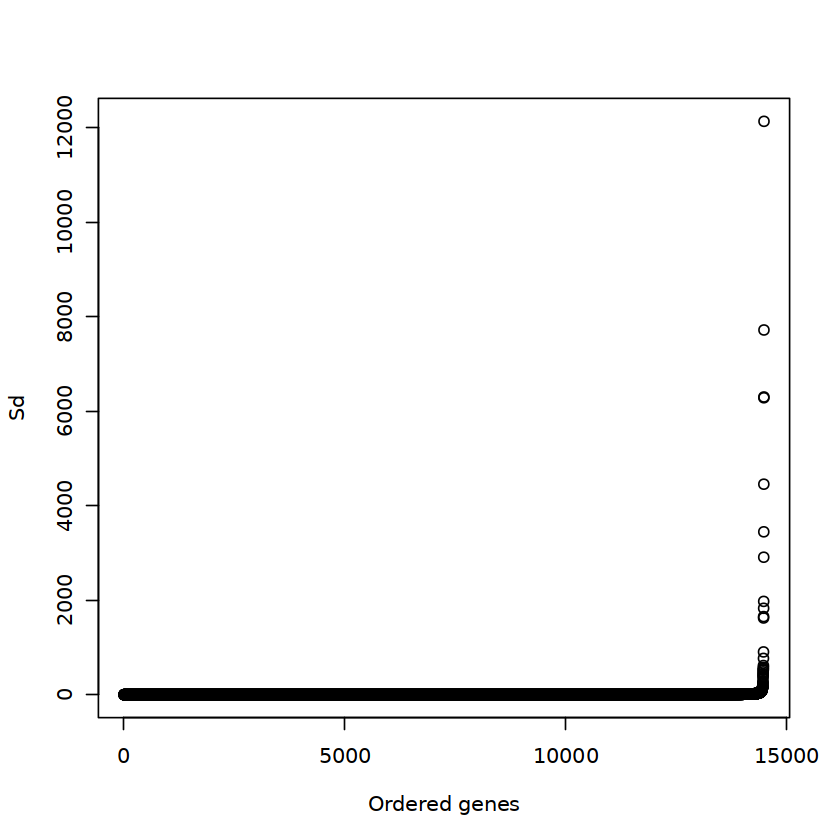

In [79]:
time.check = function(
    path = data_path,
    fpkm = fpkm,
    groupinfo = groupinfo,
    out_path = out_path
){
    exprfile = paste0(path,fpkm)
    groupinfo = paste0(path,groupinfo)
    if (!file.exists(exprfile) &&  !file.exists(groupinfo) ){
        stop("table do not exist ,please check it  ")
    } else {
        checkfile = as.data.frame(c(exprfile,groupinfo))
        write.table(checkfile,
              file = paste0(out_path, "/time_plot_file.txt"), 
              row.names = F, quote = F, col.names = F)
    }
   return(0)
}


time.plot = function(
    out_path,
    cluster = cluster
){
   checkfile = paste0(out_path,'time_plot_file.txt')
    if (!file.exists(checkfile)){
        print("checkfile do not exist ,please check it  ")
    } else {
        checkfile = read.table(checkfile,sep = '\t',stringsAsFactors = F,header =F,check.names = F)[,1]
    }

    
    library(dplyr)
    library(tidyverse)
    library(ggradar)
    library(dplyr)
    library(scales)
    library(tibble)
    library(Mfuzz)
    library("Cairo")
    library(RColorBrewer)#
    expr = read.table(checkfile[1],sep = '\t',stringsAsFactors = F,header =T,check.names = F,row.names = 1)
    groupinfo = read.table(checkfile[2],sep = '\t',stringsAsFactors = F,header =T,check.names = F,row.names = 1)

    colnames(expr) = groupinfo$group
    avereps_df<- t(limma::avereps(t(expr), ID = colnames(expr)))    
    avereps_df=avereps_df[rowMeans(avereps_df)>0,]

    head(avereps_df)
    protein <- avereps_df
    dim(protein)
    
   
    mfuzz_class <- new('ExpressionSet',exprs = protein)
    mfuzz_class <- filter.NA(mfuzz_class, thres = 0.25)
    mfuzz_class <- fill.NA(mfuzz_class, mode = 'mean')
    mfuzz_class <- filter.std(mfuzz_class, min.std = 0)
    mfuzz_class <- standardise(mfuzz_class)
    set.seed(123)

    c<-cluster
     
    
    #计算最佳的m值。
    m<-mestimate(mfuzz_class)
    
    
    print(m)
    #聚类。
    cl<-mfuzz(mfuzz_class, c=c, m=m)
   
    
    col<-c('#1E88E5','#43A047','#FDD835','#FB8C00','#E53935','#90A4AE')
    
    pdf(paste0(out_path,"time.pdf"))
    mfuzz.plot(mfuzz_class,cl,mfrow=c(2,4),col,new.window=FALSE)
    dev.off()
    write.table(cl$cluster,paste0(out_path,'time.output.txt'),quote=F,row.names=T,col.names=F,sep='\t')

}
# path = '/import/box/'
# fpkm = 'rna.txt'
# groupinfo = 'group.txt'
# cluster = 8
# time.check(data_path,fpkm,groupinfo,out_path)
# time.plot(out_path,cluster)

In [48]:
pca.check = function(
    path = outpath,
    fpkm = fpkm,
    groupinfo = groupinfo
){
    exprfile = paste0(path,fpkm)
    groupinfo = paste0(path,groupinfo)
    if (!file.exists(exprfile) &&  !file.exists(groupinfo) ){
        stop("table do not exist ,please check it  ")
    } else {
        checkfile = as.data.frame(c(exprfile,groupinfo))
        write.table(checkfile,
              file = paste0(path, "/pca_plot_file.txt"), 
              row.names = F, quote = F, col.names = F)
    }
   return(checkfile)
}


pca.plot = function(
    outpath
){
    checkfile = paste0(outpath,'pca_plot_file.txt')
    if (!file.exists(checkfile)){
        print("checkfile do not exist ,please check it  ")
    } else {
        checkfile = read.table(checkfile[1],sep = '\t',stringsAsFactors = F,header =F,check.names = F)
    }
    library(dplyr)
    library(tidyverse)
    library(ggradar)
    library(dplyr)
    library(scales)
    library(tibble)
    
    library(Mfuzz)
    count = read.table(checkfile[1,1],sep = '\t',stringsAsFactors = F,header =T,check.names = F,row.names = 1)
    group = read.table(checkfile[2,1],sep = '\t',stringsAsFactors = F,header =T,check.names = F,row.names = 1)
    probesetvar = apply(count, 1, var)  
    ord = order(probesetvar, decreasing=TRUE)[1:2000]
    pca = prcomp(t(count[ord,]), scale=TRUE)
    
    library(factoextra)
    group=group$group
    fviz_pca_ind(pca,
                 #geom.ind="point",
                 col.ind=group,
                 pointsize=1,
                 pointshape=21,
                 fill.ind=group,
                 addEllipses=TRUE,
                 mean.point=F,
    #palette=c("#00AFBB","#E7B800","#FC4E07","blue"),
    legend.titl="Groups",title="")+theme_bw()+ 
      theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid")) +
    ggforce::geom_mark_ellipse(aes(fill = group,
                            color = group)) 
    ggsave(paste0(outpath,"pca.pdf"))
}
path = '/import/box/'
fpkm = 'rna.txt'
groupinfo = 'group.txt'
pca.check(path,fpkm,groupinfo)
pca.plot(path)

"c(exprfile, groupinfo)"
<chr>
/import/box/rna.txt
/import/box/group.txt


Saving 6.67 x 6.67 in image
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse


In [83]:
upset.check = function(
    data_path = data_path,
    out_path = out_path,
    filename = filename
){
    plotfile = paste0(data_path,filename)
    if (!file.exists(plotfile)){
        print("table do not exist ,please check it  ")
    } else {
        write.table(as.data.frame(plotfile),
              file = paste0(out_path, "/upset_plot_file.txt"), 
              row.names = F, quote = F, col.names = F)
    }
    return(0)
}


upset.plot = function(
    out_path
){
    checkfile = paste0(out_path,'upset_plot_file.txt')
    print(checkfile)
    if (!file.exists(checkfile)){
        print("checkfile do not exist ,please check it  ")
    } else {
        file = read.table(checkfile,sep = '\t',stringsAsFactors = F,header =F,check.names = F)[1,1]
    }
    data  = read.table(file,sep = '\t',stringsAsFactors = F,header =F,check.names = F)
    
    colnames(data) = c('Nr','Swissport','KOG','GO','KEGG')

    library(UpSetR)
    library(openxlsx)
    library(RColorBrewer)
    p = upset(fromList(data),
      nsets=length(data),#显示数据集的所有数据,nsets = 数值调整可视化数据集数量
      nintersects=30,#显示前多少个
      number.angles = 0, #交互集合柱状图的柱标倾角
      point.size=4, #图中点的大小
      line.size=1, #图中连接线粗细
      mainbar.y.label="Intersection size", #y轴的标签
      main.bar.color = 'black', #y轴柱状图颜色
      matrix.color="black", #x轴点的颜色
      sets.x.label="Set size",   #x轴的标签
      sets.bar.color=brewer.pal(ncol(data),"Set3"),#x轴柱状图的颜色;Set1中只有9个颜色，Set3中有12个颜色，Paired中有12个颜色
      mb.ratio = c(0.7, 0.3), 
      order.by = "freq", 
      text.scale=c(1.5,1.5,1.5,1.5,1.5,1), 
      shade.color="red") 
    pdf(paste0(out_path,"upset.pdf"))
    print(p)
    dev.off()
}

data_path= '/import/box/'
out_path = '/import/boxout/'
filename = 'data.txt'
checkfile = upset.check(data_path,out_path,filename)
upset.plot(out_path)

[1] "/import/boxout/upset_plot_file.txt"


ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 14975 did not have 5 elements


In [88]:
file = '/import/box/data.txt'

In [89]:
data  = read.table(file,sep = '\t',stringsAsFactors = F,header =F,check.names = F)

In [92]:

    
    colnames(data) = c('Nr','Swissport','KOG','GO','KEGG')

    library(UpSetR)
    library(openxlsx)
    library(RColorBrewer)
    p = upset(fromList(data),
      nsets=length(data),#显示数据集的所有数据,nsets = 数值调整可视化数据集数量
      nintersects=30,#显示前多少个
      number.angles = 0, #交互集合柱状图的柱标倾角
      point.size=4, #图中点的大小
      line.size=1, #图中连接线粗细
      mainbar.y.label="Intersection size", #y轴的标签
      main.bar.color = 'black', #y轴柱状图颜色
      matrix.color="black", #x轴点的颜色
      sets.x.label="Set size",   #x轴的标签
      sets.bar.color=brewer.pal(ncol(data),"Set3"),#x轴柱状图的颜色;Set1中只有9个颜色，Set3中有12个颜色，Paired中有12个颜色
      mb.ratio = c(0.7, 0.3), 
      order.by = "freq", 
      text.scale=c(1.5,1.5,1.5,1.5,1.5,1), 
      shade.color="red") 
    pdf(paste0(out_path,"upset.pdf"),width = 9)
    print(p)
    dev.off()

png 
  2

In [95]:
head(data,2)

,Nr,Swissport,KOG,GO,KEGG
,<chr>,<chr>,<chr>,<chr>,<chr>
1,g1.t1,g2.t1,g12.t1,g12.t1,g1.t1
2,g2.t1,g9.t1,g13.t1,g13.t1,g2.t1


In [97]:
length(union(union(union(union(data$Nr,data$Swissport),data$KOG),data$GO),data$KEGG))

[1] 21200

In [103]:
21200/26901

[1] 0.7880748